# Análisis de datos categóricos con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, análisis de datos y python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Datos categóricos con Python" title="Datos categóricos con Python" src="http://relopezbriega.github.io/images/categorical_data.jpg" high=400px width=600px>

## Introducción

Cuando trabajamos con [estadísticas](http://relopezbriega.github.io/tag/estadistica.html), es importante reconocer los diferentes tipos de [datos](https://es.wikipedia.org/wiki/Dato): numéricos ([discretos y continuos](https://es.wikipedia.org/wiki/Variable_discreta_y_variable_continua)), [categóricos](https://en.wikipedia.org/wiki/Categorical_variable) y ordinales. Los [datos](https://es.wikipedia.org/wiki/Dato) no son más que observaciones del mundo en que vivimos, por tanto, los mismos pueden venir en diferentes formas, no solo numérica. Por ejemplo, si le preguntáramos a nuestros amigos ¿cuántas mascotas tienen? nos podrían responder: `0, 1, 2, 4, 3, 8`; esta información por sí misma puede ser útil, pero para nuestro análisis de mascotas, nos podría servir también otro tipo de información, como por ejemplo el *género* de cada uno de nuestros amigos; de esta forma obtendríamos la siguiente información: `hombre, mujer, mujer, mujer, hombre, mujer`. Como vemos, podemos incluir a los [datos](https://es.wikipedia.org/wiki/Dato) dentro de tres categorías fundamentales: [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad) o numéricos, [datos cualitativos](https://es.wikipedia.org/wiki/Cualidad) o [categóricos](https://en.wikipedia.org/wiki/Categorical_variable) y datos ordinales.

### Datos cuantitativos

Los [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad) son representados por números; estos números van a ser significativos si representan la medida o la cantidad observada de cierta característica. Dentro de esta categoría podemos encontrar por ejemplo: cantidades de dólares, cuentas, tamaños, número de empleados, y kilómetros por hora. Con los [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad), se puede hacer todo tipo de tareas de procesamiento de datos numéricos, tales como sumarlos, calcular promedios, o medir su variabilidad. Asimismo, vamos a poder dividir a los [datos cuantitativos](https://es.wikipedia.org/wiki/Cantidad) en [discretos y continuos](https://es.wikipedia.org/wiki/Variable_discreta_y_variable_continua), dependiendo de los valores potencialmente observables.

* Los datos ***discretos*** solo van a poder asumir un valor de una lista de números específicos. Representan ítems que pueden ser *contados*; todos sus posibles valores pueden ser listados. Suele ser relativamente fácil trabajar con este tipo de [dato](https://es.wikipedia.org/wiki/Dato).

* Los datos ***continuos*** representan *mediciones*; sus posibles valores no pueden ser contados y sólo pueden ser descritos usando intervalos en la recta de los [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real). Por ejemplo, la cantidad de kilómetros recorridos no puede ser medida con exactitud, puede ser que hayamos recorrido 1.7 km o 1.6987 km; en cualquier medida que tomemos del mundo real, siempre pueden haber pequeñas o grandes variaciones. Generalmente, los *datos continuos* se suelen redondear a un número fijo de decimales para facilitar su manipulación.


### Datos cualitativos 

Si los [datos](https://es.wikipedia.org/wiki/Dato) nos dicen en cual de determinadas categorías no numéricas nuestros ítems van a caer, entonces estamos hablando de [datos cualitativos](https://es.wikipedia.org/wiki/Cualidad) o [categóricos](https://en.wikipedia.org/wiki/Categorical_variable); ya que los mismos van a representar determinada *cualidad* que los ítems poseen. Dentro de esta categoría vamos a encontrar [datos](https://es.wikipedia.org/wiki/Dato) como: el sexo de una persona, el estado civil, la ciudad natal, o los tipos de películas que le gustan. Los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable) pueden tomar valores numéricos (por ejemplo, "1" para indicar "masculino" y "2" para indicar "femenino"), pero esos números no tienen un sentido matemático.

### Datos ordinales

Una categoría intermedia entre los dos tipos de [datos](https://es.wikipedia.org/wiki/Dato) anteriores, son los *datos ordinales*. En este tipo de [datos](https://es.wikipedia.org/wiki/Dato), va a existir un *orden* significativo, vamos a poder clasificar un primero, segundo, tercero, etc. es decir, que podemos establecer un *ranking* para estos [datos](https://es.wikipedia.org/wiki/Dato), el cual posiblemente luego tenga un rol importante en la etapa de análisis. Los [datos](https://es.wikipedia.org/wiki/Dato) se dividen en categorías, pero los números colocados en cada categoría tienen un significado. Por ejemplo, la calificación de un restaurante en una escala de 0 (bajo) a 5 (más alta) estrellas representa *datos ordinales*. Los *datos ordinales* son a menudo tratados como [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable), en el sentido que se suelen agrupar y ordenar. Sin embargo, a diferencia de los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable), los números sí tienen un significado matemático.

En este artículo me voy a centrar en el segundo grupo, los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable); veremos como podemos manipular fácilmente con la ayuda de [Python](http://python.org/) estos [datos](https://es.wikipedia.org/wiki/Dato) para poder encontrar *patrones*, *relaciones*, *tendencias* y *excepciones*. 

## Análisis de datos categóricos con Python

Para ejemplificar el análisis, vamos a utilizar nuestras habituales librerías científicas [NumPy](http://www.numpy.org/), [Pandas](http://pandas.pydata.org/),  [Matplotlib](http://matplotlib.org/) y [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/). También vamos a utilizar la librería [pydataset](https://github.com/iamaziz/PyDataset), la cual nos facilita cargar los diferentes [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) para analizar. 

La idea es realizar un análisis [estadístico](http://relopezbriega.github.io/tag/estadistica.html) sobre los [datos](https://es.wikipedia.org/wiki/Dato) de los sobrevivientes a la tragedia del [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic).

### La tragedia del Titanic

El hundimiento del [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic) es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic) se hundió después de chocar con un iceberg, matando a miles de personas. Esta tragedia sensacional conmocionó a la comunidad internacional y condujo a mejores normas de seguridad aplicables a los buques. 
Una de las razones por las que el naufragio dio lugar a semejante cantidad de muertes fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrada en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

El siguiente [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) proporciona información sobre el destino de los pasajeros en el viaje fatal del trasatlántico [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic), que se resume de acuerdo con el nivel económico (clase), el sexo, la edad y la supervivencia.

In [1]:
# <!-- collapse=True -->
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from pydataset import data

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
# importando dataset
titanic = data('titanic')

In [3]:
# ver primeros 10 registros
titanic.head(10)

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
6,1st class,adults,man,yes
7,1st class,adults,man,yes
8,1st class,adults,man,yes
9,1st class,adults,man,yes
10,1st class,adults,man,yes


El problema con [datos](https://es.wikipedia.org/wiki/Dato) como estos, y en general con la mayoría de las *tablas de [datos](https://es.wikipedia.org/wiki/Dato)*, es que nos presentan mucha información y no nos permiten ver que es lo que realmente sucede o sucedió. Por tanto, deberíamos procesarla de alguna manera para hacernos una imagen de lo que los [datos](https://es.wikipedia.org/wiki/Dato) realmente representan y nos quieren decir; y que mejor manera para hacernos una imagen de algo que utilizar *visualizaciones*. Una buena *visualización de los datos* puede revelar cosas que es probable que no podamos ver en una tabla de números y nos ayudará a pensar con claridad acerca de los patrones y relaciones que pueden estar escondidos en los [datos](https://es.wikipedia.org/wiki/Dato). También nos va a ayudar a encontrar las características y patrones más importantes o los casos que son realmente excepcionales y no deberíamos de encontrar.

### Tablas de frecuencia

Para *hacernos una imagen* de los [datos](https://es.wikipedia.org/wiki/Dato), lo primero que tenemos que hacer es agruparlos. Al armar diferentes grupos nos vamos acercando a la comprensión de los [datos](https://es.wikipedia.org/wiki/Dato). La idea es ir amontonamos las cosas que parecen ir juntas, para poder ver como se distribuyen a través de las diferentes categorías. Para los [datos categóricos](https://en.wikipedia.org/wiki/Categorical_variable), agrupar es fácil; simplemente debemos contar el número de
ítems que corresponden a cada categoría y apilarlos.
Una forma en la que podemos agrupar nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) del [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic) es contando las diferentes *clases* de pasajeros. Podemos organizar estos conteos en una *tabla de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)*, que registra los totales y los nombres de las categorías utilizando la función `value_counts` que nos proporciona [Pandas](http://pandas.pydata.org/) del siguiente modo: 

In [4]:
# tabla de frecuencia de clases de pasajeros
pd.value_counts(titanic['class'])

3rd class    706
1st class    325
2nd class    285
dtype: int64

Contar las cantidad de apariciones de cada categoría puede ser útil, pero a veces puede resultar más útil saber la *fracción o proporción* de los [datos](https://es.wikipedia.org/wiki/Dato) de cada categoría, así que podríamos entonces dividir los recuentos por el total de casos para obtener los porcentajes que representa cada categoría. 

Una *tabla de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) relativa* muestra los porcentajes, en lugar de los recuentos de los valores en cada categoría. Ambos tipos de tablas muestran cómo los
casos se distribuyen a través de las categorías. De esta manera, ellas describen la *distribución* de una [variable categórica](https://en.wikipedia.org/wiki/Categorical_variable), ya que enumeran las posibles categorías y nos dicen con qué frecuencia se produce cada una de ellas.

In [5]:
# tabla de frecuencia relativa de pasajeros
100 * titanic['class'].value_counts() / len(titanic['class'])

3rd class    53.647416
1st class    24.696049
2nd class    21.656535
dtype: float64

### Gráficos de tartas y barras

Ahora que ya conocemos a las *tablas de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)* ya estamos en condiciones de crear visualizaciones que realmente nos den una imagen de los [datos](https://es.wikipedia.org/wiki/Dato), sus propiedades y sus relaciones. En este punto, debemos ser sumamente cuidadosos, ya que una mala visualización puede llegar a distorsionar nuestra comprensión, en lugar de ayudarnos. 
Las mejores *visualizaciones de datos* siguen un principio fundamental llamado el **principio del área**. Este principio nos dice que el área ocupada por cada parte del gráfico se debe corresponder con la magnitud del valor que representa. Violaciones del *principio de área* son una forma común de mentir con [estadísticas](http://relopezbriega.github.io/tag/estadistica.html). Dos gráficos útiles que podemos utilizar para representar nuestros [datos](https://es.wikipedia.org/wiki/Dato) y que cumplen con este principio son el [gráfico de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) y el [gráfico de tarta](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular).

#### Gráfico de barras

El [gráfico de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) nos ayuda a darnos una impresión visual más precisa de la distribución de nuestros [datos](https://es.wikipedia.org/wiki/Dato). La altura de cada barra muestra el recuento de su categoría. Los barras tienen el  mismo ancho, por lo que sus alturas determinan sus áreas, y estas áreas son proporcionales a los recuentos en cada categoría. De esta forma, podemos ver fácilmente que había más del doble de pasajeros de tercera clase, que de primera o segunda clase. Los [gráficos de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) hacen que este tipo de comparaciones sean fáciles y naturales. Veamos como podemos crearlos de forma sencilla utilizando el método `plot` dentro de un `DataFrame` de [Pandas](http://pandas.pydata.org/). 

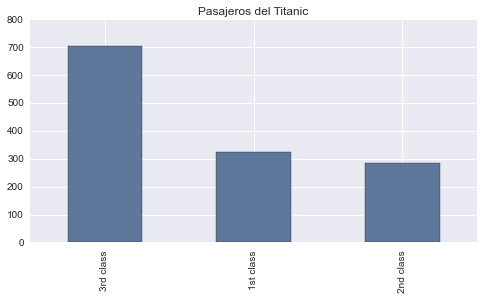

In [6]:
# Gráfico de barras de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='bar',
                                            title='Pasajeros del Titanic')

Si quisiéramos enfocarnos en la *proporción relativa* de los pasajeros de cada una de las clases, simplemente podemos sustituir a los recuentos con porcentajes y utilizar un *gráfico de barras de frecuencias relativas*.

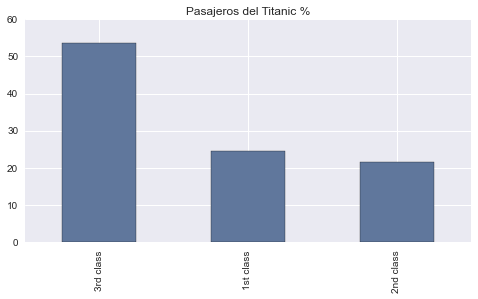

In [7]:
# gráfico de barras de frecuencias relativas.
plot = (100 * titanic['class'].value_counts() / len(titanic['class'])).plot(
kind='bar', title='Pasajeros del Titanic %')

#### Gráfico de tartas

El [gráfico de tarta](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) muestra el total de casos como un círculo y luego corta este círculo en piezas cuyos tamaños son proporcionales a la fracción que cada categoría representa sobre el total de casos. Los [gráfico de tarta](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) dan una impresión rápida de cómo todo un grupo se divide en grupos más pequeños. Lo podríamos graficar del siguiente modo, también utilizando el método `plot`:

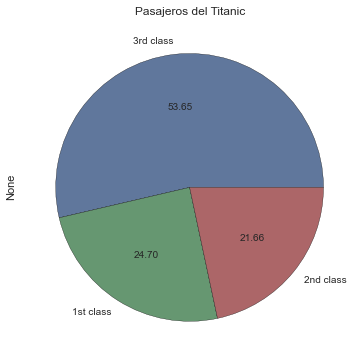

In [8]:
# Gráfico de tarta de pasajeros del Titanic
plot = titanic['class'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Pasajeros del Titanic')

Como se puede apreciar, con el [gráfico de tarta](https://es.wikipedia.org/wiki/Gr%C3%A1fico_circular) no es tan fácil determinar que los pasajeros de tercera clase son más que el doble que los de primera clase; tampoco es fácil determinar si hay más pasajeros de primera o de segunda clase. Para este tipo de comparaciones, son mucho más útiles los [gráficos de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras).

### Relacionando variables categóricas

Al analizar la tragedia del [Titanic](https://es.wikipedia.org/wiki/RMS_Titanic), una de las preguntas que podríamos hacer es ¿existe alguna relación entre la clase de pasajeros y la posibilidad de alcanzar un bote salvavidas y sobrevivir a la tragedia? Para poder responder a esta pregunta, vamos a necesitar analizar a las variables *class* y *survived* de nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) en forma conjunta. Una buena forma de analizar dos [variables categóricas](https://en.wikipedia.org/wiki/Categorical_variable) en forma conjunta, es agrupar los recuentos en una tabla de *doble entrada*; este tipo de tablas se conocen en [estadística](http://relopezbriega.github.io/tag/estadistica.html) con el nombre de [tabla de contingencia](https://es.wikipedia.org/wiki/Tabla_de_contingencia). Veamos como podemos crear esta tabla utilizando la función `crosstab` de [Pandas](http://pandas.pydata.org/). 

In [9]:
# Tabla de contingencia class / survived
pd.crosstab(index=titanic['survived'],
            columns=titanic['class'], margins=True)

class,1st class,2nd class,3rd class,All
survived,,,,
no,122,167,528,817
yes,203,118,178,499
All,325,285,706,1316


Los márgenes de la tabla, tanto en la derecha y en la parte inferior, nos muestran los totales. La línea inferior de la tabla representa la distribución de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de la clase de pasajeros. La columna derecha de la tabla es la distribución de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica) de la variable supervivencia. 
Cuando se presenta la información de este modo, cada celda de cada uno de los márgenes de la tabla representa la *distribución marginal* de esa variable en particular. Cada celda nos va a mostrar el recuento para la combinación de los valores de nuestras dos [variables categóricas](https://en.wikipedia.org/wiki/Categorical_variable), en este caso *class* y *survived*.

Al igual de como habíamos visto con las *tablas de [frecuencia](https://es.wikipedia.org/wiki/Frecuencia_estad%C3%ADstica)*, también nos podría ser útil representar a las [tablas de contingencia](https://es.wikipedia.org/wiki/Tabla_de_contingencia) con porcentajes relativos; esto lo podríamos realizar utilizando el método `apply` del siguiente modo:

In [10]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=titanic['survived'], columns=titanic['class'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1)

class,1st class,2nd class,3rd class,All
survived,,,,
no,9.270517,12.689970,40.121581,62.082067
yes,15.425532,8.966565,13.525836,37.917933
All,24.696049,21.656535,53.647416,100.000000


Con esta tabla podemos ver fácilmente que solo el 37.91% de los pasajeros sobrevivió a la tragedia y que este 37% se compone de la siguiente forma: del total de pasajeros sobrevivió un 15.42% de pasajeros que eran de primera clase, un 8.97% que eran de segunda clase y un 13.52% que eran pasajeros de tercera clase.

Volviendo a nuestra pregunta inicial sobre la posibilidad de sobrevivir según la clase de pasajero, podría ser más útil armar la tabla de porcentajes como un porcentaje relativo sobre el total de cada fila, es decir calcular el porcentaje relativo que cada clase tiene sobre haber sobrevivido o no. Esto lo podemos realizar del siguiente modo:

In [11]:
# tabla de contingencia en porcentajes relativos segun sobreviviente
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

class,1st class,2nd class,3rd class
survived,,,
no,14.932681,20.440636,64.626683
yes,40.681363,23.647295,35.671343


Aquí podemos ver que de los pasajeros que sobrevivieron a la tragedia, el 40.68% correspondían a primera clase, el 35.67% a tercera clase y el 23.65% a segunda clase. Por tanto podríamos inferir que los pasajeros de primera clase tenían más posibilidades de sobrevivir. 

Es más, también podríamos armar la tabla de porcentaje relativos en relación al total de cada clase de pasajero y así podríamos ver que de los pasajeros de primera clase, logró sobrevivir un 62.46%. 

In [12]:
# tabla de contingencia en porcentajes relativos segun clase
pd.crosstab(index=titanic['survived'], columns=titanic['class']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

class,1st class,2nd class,3rd class
survived,,,
no,37.538462,58.596491,74.787535
yes,62.461538,41.403509,25.212465


Este último resultado lo podríamos representar visualmente con simples [gráfico de barras](https://es.wikipedia.org/wiki/Diagrama_de_barras) del siguiente modo:

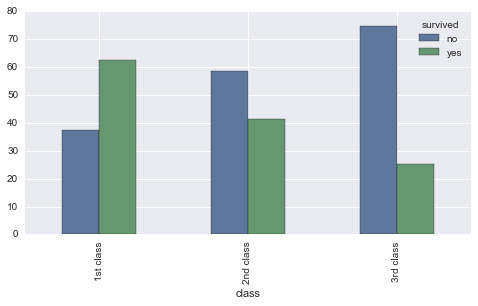

In [13]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['class'],
            columns=titanic['survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

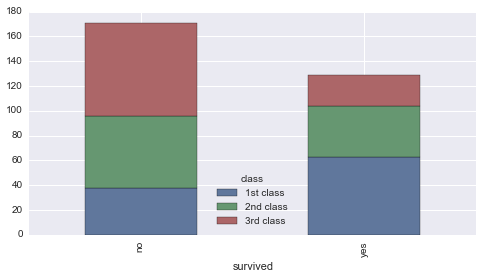

In [14]:
# Gráfico de barras de sobreviviviente segun clase
plot = pd.crosstab(index=titanic['survived'],
            columns=titanic['class']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

Estas mismas manipulaciones las podemos realizar para otro tipo de combinación de [variables categóricas](https://en.wikipedia.org/wiki/Categorical_variable), como podría ser el *sexo* o la *edad* de los pasajeros, pero eso ya se los dejo a ustedes para que se entretengan y practiquen un rato.

Con este termina esta artículo, si les gustó y están interesados en la [estadísticas](http://relopezbriega.github.io/tag/estadistica.html), no duden en visitar mi anterior artículo [Probabilidad y Estadística con Python](http://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/) y seguir la novedades del blog!

Saludos!

*Este post fue escrito utilizando Jupyter notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/CategoricalPython.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/CategoricalPython.ipynb).*